In [93]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy as cp

Q. 1. A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.


     Minitab File : Cutlets.mtw

Hypothesis: There is significant difference in diameter of the cutlets.

In [5]:
cutlet_data = pd.read_csv('Cutlets.csv')

In [6]:
cutlet_data

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


In [8]:
unit_a = cutlet_data['Unit A']
unit_b = cutlet_data['Unit B']

In [9]:
cutlet_data.mean()

Unit A    7.019091
Unit B    6.964297
dtype: float64

In [8]:
cutlet_data.median()

Unit A    6.9438
Unit B    6.9399
dtype: float64

In [9]:
# checking normality with Shapiro-wilk test
stat_a, p_value_a = cp.stats.shapiro(unit_a)
stat_b, p_value_b = cp.stats.shapiro(unit_b)

In [10]:
print(stat_a, p_value_a)
print(stat_a, p_value_b)

0.9649459719657898 0.31998491287231445
0.9649459719657898 0.5225146412849426


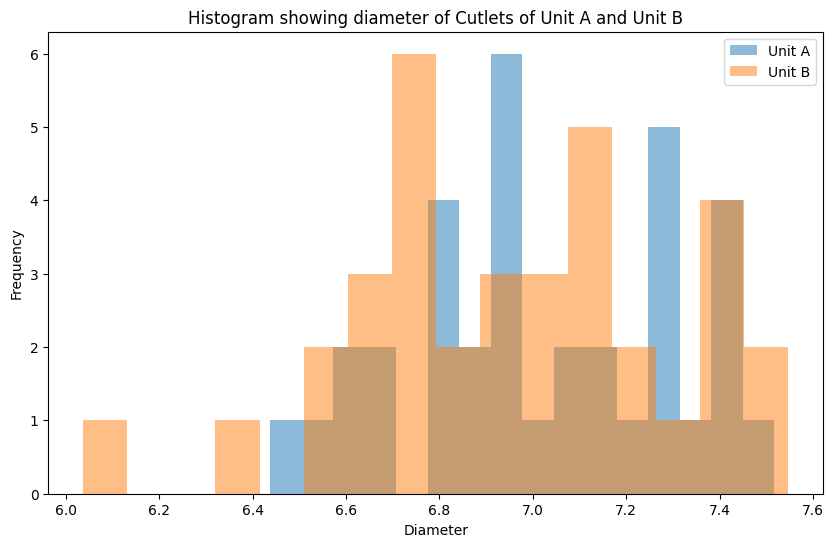

In [14]:
# histogram of Unit A and UNit B
plt.figure(figsize=(10, 6))
plt.hist(unit_a, bins=16, alpha=0.5, label='Unit A')
plt.hist(unit_b, bins=16, alpha=0.5, label='Unit B')
plt.xlabel('Diameter')
plt.ylabel('Frequency')
plt.title('Histogram showing diameter of Cutlets of Unit A and Unit B')
plt.legend()
plt.show()

It is assumed that:
    1. As mean and median of unit a and unit b seems to be same, individually, the varances are also equal
    2. data is normally or near to normally distributed

In [10]:
unit_a = cutlet_data['Unit A']
unit_b = cutlet_data['Unit B']

In [13]:
# with the help of T test
t_stat, p_value = cp.stats.ttest_ind(unit_a, unit_b)


In [16]:
significance_level = 0.05 # Significance level = 5% = 5/100 = 0.05

print(t_stat)
print(p_value)

0.7228688704678063
0.47223947245995


In [18]:
if p_value < significance_level:
    print("Reject the null hypothesis: There is a significant difference in the mean diameter of the cutlet between Unit A and Unit B.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the mean diameter of the cutlet between Unit A and Unit B.")

Fail to reject the null hypothesis: There is no significant difference in the mean diameter of the cutlet between Unit A and Unit B.


There is no significant difference in the mean diameter of the cutlet between Unit A and Unit B. Hence we reject the hypothesis that we had considered for cutlets.

Q 2. A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.
   
  Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.
 
 
    Minitab File: LabTAT.mtw


In [3]:
labtat_data = pd.read_csv('LabTAT.csv')

In [15]:
labtat_data

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
...,...,...,...,...
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87


In [16]:
lab1 = labtat_data['Laboratory 1']
lab2 = labtat_data['Laboratory 2']
lab3 = labtat_data['Laboratory 3']
lab4 = labtat_data['Laboratory 4']

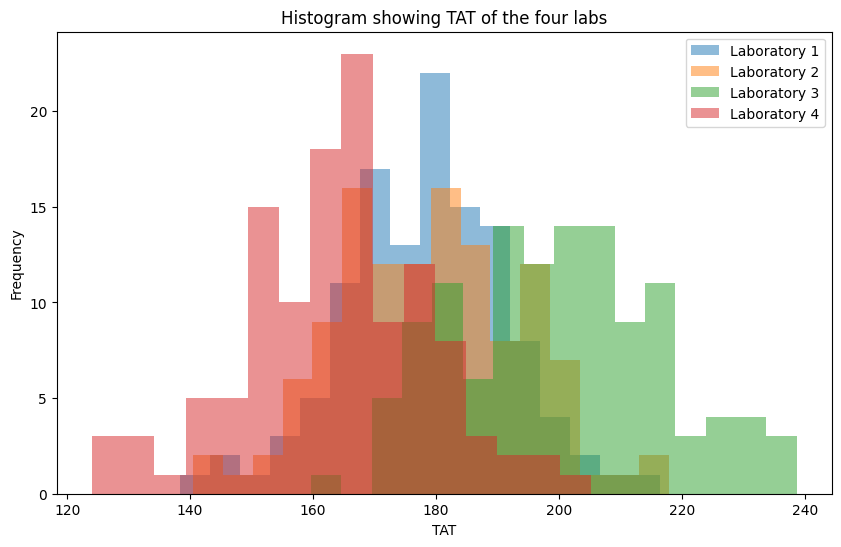

In [17]:
# histogram
plt.figure(figsize=(10, 6))
plt.hist(lab1, bins=16, alpha=0.5, label='Laboratory 1')
plt.hist(lab2, bins=16, alpha=0.5, label='Laboratory 2')
plt.hist(lab3, bins=16, alpha=0.5, label='Laboratory 3')
plt.hist(lab4, bins=16, alpha=0.5, label='Laboratory 4')
plt.xlabel('TAT')
plt.ylabel('Frequency')
plt.title('Histogram showing TAT of the four labs')
plt.legend()
plt.show()

In [27]:
sig_lvl = 0.05 # significance level at 5% as usual

It is being assumed that: 
        1.   Data is normally distributed
        2.   Variance is similar between all the labs


HYPOTHESIS: There is significant difference in average TAT between the laboratories

In [30]:
# T-tests
t_stat, p_value1 = cp.stats.ttest_ind(lab1, lab2)
t_stat, p_value2 = cp.stats.ttest_ind(lab3, lab1)
t_stat, p_value3 = cp.stats.ttest_ind(lab1, lab4)
t_stat, p_value4 = cp.stats.ttest_ind(lab2, lab3)
t_stat, p_value5 = cp.stats.ttest_ind(lab2, lab4)
t_stat, p_value6 = cp.stats.ttest_ind(lab4, lab3)

In [29]:
no_of_comparison = 6
alpha_corr = sig_lvl/no_of_comparison

In [33]:
print("p_value1---", p_value1)
print("p_value2---", p_value2)
print("p_value3---", p_value3)
print("p_value4---", p_value4)
print("p_value5---", p_value5)
print("p_value6---", p_value6)

p_value1--- 0.7663277896545946
p_value2--- 1.4885264395661512e-23
p_value3--- 4.520137047009826e-14
p_value4--- 7.029124901932707e-21
p_value5--- 1.4261693708240927e-13
p_value6--- 2.1080551000374276e-45


All the p values are above the level of significance level. Hence, there is a significant difference in the average TAT between the laboratories. Hence, the hypothese that we took into consideration is accepted.

Fail to reject the null hypothesis: Male-female buyer ratios are similar across regions.


Q 3.          Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions.

#### Data as per the table given in excel file

In [19]:
buyer_ratio = pd.read_csv('BuyerRatio.csv')

In [20]:
buyer_ratio

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


#### Hypothesis: There is significant difference in male-female buying ratio of the four region 

In [21]:
buyer_values = np.array([[50, 142, 131, 70], [435, 1523, 1356, 750]])

In [24]:
buyer_ratio = buyer_ratio.apply(pd.to_numeric, errors='coerce') # error was coming hence buyer_ratio dataframe was converted into numeric

# Chi sqare test (to test independence)
chi2_stat, p_value, dof, expected = cp.stats.chi2_contingency(buyer_values)

sig_lvl = 0.05

In [25]:
print(chi2_stat)
print(p_value)

1.595945538661058
0.6603094907091882


As p_value is more than significance level of 5%, the hypothesis that was taken into consideration is to be  rejected.
It can be concluded that there no significant difference in buying ratios of men and women.

p_value is les 

In [54]:
# male-female buying ratios calculated as usual
print("East:", 50/435 * 100, "West:", 142/1523 * 100, "North:", 131/1356 * 100, "South:", 70/750 * 100)

East: 11.494252873563218 West: 9.32370321733421 North: 9.660766961651918 South: 9.333333333333334


Even by calculating ratios as usual, it can be concluded that there no significant difference in buying ratios of men and women.

In [61]:
average_of_ratios = [11.4942, 9.3237, 9.6608, 9.333]

In [36]:
if p_value < sig_lvl:
    print("Reject the null hypothesis: Male-female buyer ratios are not similar across regions.")
else:
    print("Fail to reject the null hypothesis: Male-female buyer ratios are similar across regions.")

Reject the null hypothesis: Male-female buyer ratios are not similar across regions.


#### Data as per the table given in powerpoint file

In [28]:
#uploading data as given in ppt

buyer_ratio2 = pd.read_csv('BuyerRatio(as_given_in_ppt).csv')

In [29]:
buyer_ratio2

,Unnamed: 0,East,West,North,South
0,Males,50,142,131,70
1,Females,550,351,480,350


#### Hypothesis: There is significant difference in male-female buying ratio of the four region

In [30]:
buyer_values2 = np.array([[50, 142, 131, 70], [550, 351, 480, 350]])

In [32]:
buyer_ratio2 = buyer_ratio2.apply(pd.to_numeric, errors='coerce') 

# Chi sqare test (to test independence)
chi2_stat, p_val, dof, expected = cp.stats.chi2_contingency(buyer_values2)
sig_lvl = 0.05


In [33]:
print(chi2_stat)
print(p_value)

80.27295426602495
0.6603094907091882


As p_value is more than significance level of 5%, the hypothesis that was taken into consideration is to be  rejected.
It can be concluded that there no significant difference in buying ratios of men and women.

Q 4. TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences

Minitab File: CustomerOrderForm.mtw
 


HYPOTHESIS: The defective percentage varies by center

In [38]:
custord_data = pd.read_csv('Costomer+OrderForm.csv')


In [40]:
custord_data

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


In [55]:
custord_data = custord_data.applymap(lambda x: 0 if x == 'Error Free' else 1)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20252\2124270223.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  custord_data = custord_data.applymap(lambda x: 0 if x == 'Error Free' else 1)


In [56]:
custord_data

,Phillippines,Indonesia,Malta,India
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1
...,...,...,...,...
295,1,1,1,1
296,1,1,1,1
297,1,1,1,1
298,1,1,1,1


In [72]:
data = pd.read_csv('Costomer+OrderForm.csv')


In [73]:
data

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


In [103]:
from scipy.stats import chi2_contingency

custord_data = pd.read_csv('Costomer+OrderForm.csv', header=None)

# Convert "Error Free" to 0 and "Defective" to 1
custord_data = custord_data.applymap(lambda x: 0 if x == "Error Free" else 1)



C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20252\2024156758.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  custord_data = custord_data.applymap(lambda x: 0 if x == "Error Free" else 1)


In [101]:
# Create a contingency table
contingency_table = pd.crosstab(columns=custord_data[0], index=custord_data[1])

# Perform the Chi-squared test of independence
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Set the significance level (alpha = 0.05)
alpha = 0.05

In [102]:
# Print the results
print("Chi-square statistic:", chi2_stat)
print("p-value:", p_val)

Chi-square statistic: 0.0
p-value: 1.0


The hypothesis is rejected.
The defective percentage does not vary by center